Let's start by importing the necessary libraries.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Declare network graph object to use for this project.

In [2]:
G=nx.Graph()

Add nodes and edges. Here we are using a weight for all edges, the weight is the amount of edges already, since that was defined in the SQL part.

In [3]:
inputedges = pd.read_csv('edges.csv')
inputnodes = pd.read_csv('nodes.csv')

for i,r in inputnodes.iterrows():
    G.add_node(r['ID'])
    
for i,r in inputedges.iterrows():
    G.add_edge(r['Source'],r['Target'], weight=r['Weight'])

Apply Fruchterman-Reingold force-directed algorithm to data. There are more lay-outs available, 3 others have been included to show how these lay-outs can be generated. I recommend you google or try (by deleting the '#') these lay-outs to see how they might work out :)

More information can be found here: https://networkx.github.io/documentation/networkx-1.9/reference/drawing.html#module-networkx.drawing.layout

In [15]:
pos=nx.spring_layout(G, k=0.04, iterations=10, scale=100)
# pos=nx.shell_layout(G)
# pos=nx.spectral_layout(G)
# pos=nx.random_layout(G)

Set result dataset positions as positions to be used in graph.

In [21]:
nx.set_node_attributes(G,pos, 'pos')

Set entrance into network and exit from network as top left and bottom right nodes. This is done manually by setting the nodes -2 and -1 to their array of coordinates. You could technically set any coordinates manually this way! (Delete these lines if you don't need want to manually set node coordinates.)

In [17]:
# pos[-2] = [100.0, 0.0]
# pos[-1] = [0.0, 100.0]

Draw, save and show graphs. (This part can be omitted in a production environment, but for the sake of the tutorial, you can see it here.)

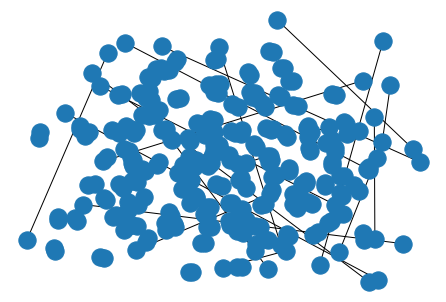

In [22]:
nx.draw(G, pos=pos)
plt.savefig("network_graph.png")
plt.show()

Structure output in pandas dataframe.

In [19]:
positions = pd.DataFrame(pos).transpose()
positions.columns = ['X','Y']

Export to csv.

In [20]:
positions.to_csv('nodepositions.csv', encoding='utf-16', index_label='ID')

In [23]:
pos

{1371: array([-15.6245336, -77.7469807]),
 395: array([-11.50364056,  26.69272838]),
 1678: array([-62.59324399, -66.8328433 ]),
 733: array([-18.81615641,  -6.65027668]),
 1935: array([-72.67442693,  23.41512678]),
 558: array([-37.64971301,  32.70181455]),
 841: array([26.6536614 , -9.37390427]),
 1570: array([33.73208867, -4.43746714]),
 1869: array([ 11.54805729, -40.59122844]),
 1674: array([-42.54500244,  48.38944379]),
 1967: array([-6.44964483, 29.92625371]),
 950: array([55.51595222, -2.17232428]),
 1630: array([32.64237688, 17.46283996]),
 1377: array([-51.50306284,  47.64995941]),
 1281: array([55.51874298, 48.1752259 ]),
 1272: array([-68.72232734, -16.20874276]),
 1603: array([-7.20920789, 54.16960783]),
 519: array([-74.46243379, -41.26234857]),
 1636: array([-86.35224626, -60.84464461]),
 1771: array([-26.53942882,  15.91003671]),
 943: array([-60.80248306, -25.14593175]),
 4: array([-4.89612491, 72.07603917]),
 491: array([ 59.24498805, -10.01122773]),
 125: array([-93.